In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

import os

from numpy import polyfit,polyval

from nonLinCorr import *

from matplotlib.gridspec import GridSpec

In [21]:
def unflatten_shots(flat_shots,mask):
    num_shots = flat_shots.shape[0]
    shape = mask.shape
    flat_mask = mask.reshape(shape[0]*shape[1]
                            )
    shots = np.zeros( (num_shots,shape[0]*shape[1]), dtype = flat_shots.dtype)
    shots[:, flat_mask ] = flat_shots
    
    return shots.reshape( (num_shots,shape[0],shape[1]))

def norm_w_mask(x,mask, threshold):
    x_out = np.zeros_like(x, dtype=np.float64)


    k=np.median(x)
    mu = np.std(x)
    this_mask = (np.abs(x - k)<mu*threshold)*mask
    x_out = x/(x[this_mask]).mean()
    
    return x_out, this_mask

def diff_mask(x,norm_ref,mask, ref_mask, threshold):
    norm_x,x_mask = norm_w_mask(x,mask, threshold = threshold)
    
    return (norm_x-norm_ref)*ref_mask*x_mask
   
def diff_all_shots(images,mask,threshold):
    diffs = np.zeros_like(images, dtype=np.float64)
    mean_img = images.mean(0)
    mean_img,mm = norm_w_mask(mean_img,mask, threshold = threshold)
    
    for ii in range(diffs.shape[0]):
        diffs[ii]=diff_mask(images[ii],mean_img,mask,
                            mm,threshold=threshold)
    return diffs

In [3]:
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/flatfield_calibration/derm_poly_imgs/cali_run115.h5','r')
f_interp = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/flatfield_calibration/interp_dermPoly_shots/interp_600_800/run115_interp_dermPoly_shots.h5','r')

print f.keys()
print f_interp.keys()
f_raw = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/flatfield_calibration/flat_det_imgs/fullImgs_run115.h5','r')
f_raw_interp = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/flatfield_calibration/interp_cali_shots/interp_600_800/run115_interp_cali_shots.h5','r')
print f_raw.keys()
print f_raw_interp.keys()
mask = np.load('/reg/d/psdm/cxi/cxilr6716/results/masks/basic_psana_mask.npy')
polar_correct=np.load('/reg/d/psdm/cxi/cxilr6716/scratch/derm/polarization_-400encode.npy')

[u'corrected_img', u'ebeam', u'event_time', u'evr', u'fiducials', u'gas_detector', u'phase_cav']
[u'single_shots_interp', u'single_shots_rp']
[u'ave_tot_int', u'ebeam', u'event_time', u'evr', u'fiducials', u'flat_img', u'gas_detector', u'phase_cav']
[u'cali_single_shots_10_interp', u'cali_single_shots_10_rp', u'cali_single_shots_15_interp', u'cali_single_shots_15_rp', u'cali_single_shots_20_interp', u'cali_single_shots_20_rp', u'cali_single_shots_5_interp', u'cali_single_shots_5_rp', u'single_shots_interp', u'single_shots_rp']


In [4]:
imgs=f['corrected_img'][:300]
img_interp=f_interp['single_shots_interp'].value
img_rp = f_interp['single_shots_rp'].value

raw_imgs = f_raw['flat_img'].value[:300]
raw_imgs = unflatten_shots(raw_imgs,mask)/ polar_correct
raw_interp=f_raw_interp['single_shots_interp'].value
raw_rp = f_raw_interp['single_shots_rp'].value

raw_mean = raw_imgs.mean(0)
mean_img = imgs.mean(0)

mean_raw_rp = raw_rp.mean(0)
mean_raw_interp = raw_interp.mean(0)

mean_rp = img_rp.mean(0)
mean_interp = img_interp.mean(0)


In [5]:
img_rp.shape

(299, 1010)

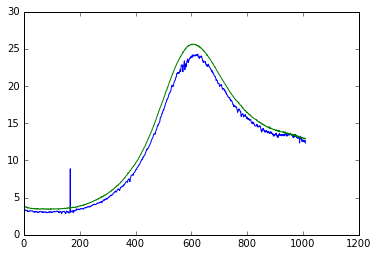

In [9]:
plt.plot(mean_rp)
plt.plot(mean_raw_rp)
# plt.ylim(-1,0.8)

In [7]:
imgs.shape

(299, 1738, 1742)

In [8]:
mean_img.mean()

10.5669020338918

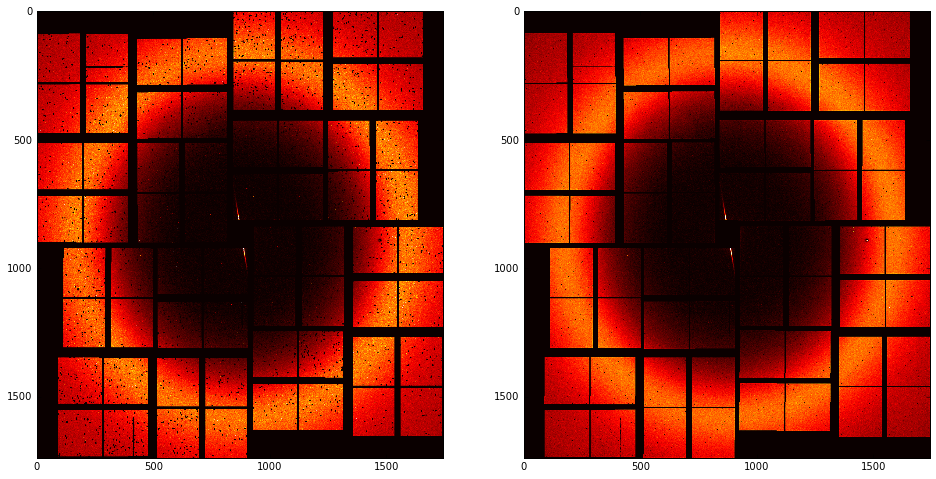

In [12]:
plt.figure(figsize=[16,8])
plt.subplot(121)
plt.imshow( mean_img, 
         aspect='auto', cmap='hot',vmin=3,vmax=45)
# plt.colorbar()

plt.subplot(122)
plt.imshow( raw_mean, 
         aspect='auto', cmap='hot',vmin=3,vmax=45)
# plt.colorbar()

In [14]:
def range_mask(img,min,max):
    return (img>min)*(img<max)

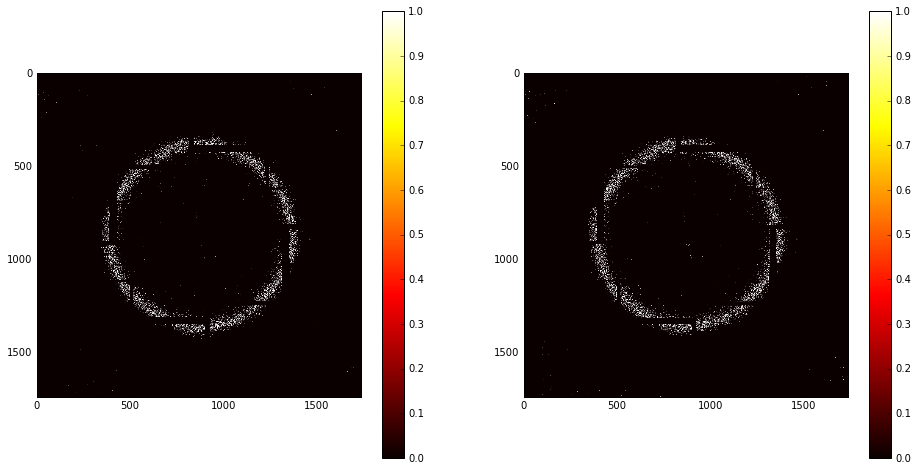

In [20]:
plt.figure(figsize=[16,8])
gs = GridSpec(1,2)
x=8
y=9
img=range_mask(mean_img,x,y)
plt.subplot(gs[0,0] )
plt.imshow(img,aspect=1,
          cmap='hot')#,vmin=10,vmax=80)
plt.colorbar()


plt.subplot(gs[0,1])
img=range_mask(raw_mean,x,y)
plt.imshow(img,aspect=1,
          cmap='hot')#,vmin=10,vmax=80)
plt.colorbar()

In [ ]:
plt.figure(figsize=[16,8])
plt.subplot(121)
threshold = img.mean()+img.std()*3
plt.imshow( img/ polar_correct >threshold, 
         aspect='auto', cmap='hot')#,vmin=30,vmax=80)

threshold = img_correct.mean()+img_correct.std()*0.5
plt.subplot(122)
plt.imshow( img_correct>threshold, 
         aspect='auto', cmap='hot')#,vmin=0,vmax=5)


In [ ]:
print img_correct.std(), img.std()